# Ourbank Churn Analysis

<img style='float: left' src='blogchurn1.png' alt='blogchurn1' width='500'/>
<!-- ![](blogchurn1.png) -->

## 1. Introduction


   Purpose of this study:

1.Identify and visualize which factors contribute to customer churn.

2.Build prediction models to predict if a customer is going to churn or not.


## 2. Data Cleaning

To understand the data set and prepare for exploratory and prediction.

In [1]:
# Import relevant librabries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix


In [2]:
#Read the data frame
df=pd.read_csv('Our Bank customer data.csv')
df.shape

(10127, 22)

In [3]:
#Check columns list and missing values
df.isnull().sum()

CLIENTNUM                       0
Attrition_Flag                  0
Customer_Age                    0
Gender                          0
Dependent_count                 0
Education_Level                 0
Marital_Status                  0
Income_Category                 0
Card_Category                   0
Months_on_book                  0
Total_Relationship_Count        0
Months_Inactive_12_mon          0
Contacts_Count_12_mon           0
Credit_Limit                    0
Total_Revolving_Bal             0
Avg_Open_To_Buy                 0
Total_Amt_Chng_Q4_Q1            0
Total_Trans_Amt                 0
Total_Trans_Ct                  0
Total_Ct_Chng_Q4_Q1             0
Avg_Utilization_Ratio           0
Unnamed: 21                 10127
dtype: int64

In [4]:
df.nunique()

CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
Unnamed: 21                     0
dtype: int64

In [5]:
df.describe(include='all')

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Unnamed: 21
count,1.012700e+04,10127,10127.000000,10127,10127.000000,10127,10127,10127,10127,10127.000000,...,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,0.0
unique,NaN,2,NaN,2,NaN,7,4,6,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Existing Customer,NaN,F,NaN,Graduate,Married,Less than $40K,Blue,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,8500,NaN,5358,NaN,3128,4687,3561,9436,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,7.391776e+08,NaN,46.325960,NaN,2.346203,NaN,NaN,NaN,NaN,35.928409,...,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894,NaN
std,3.690378e+07,NaN,8.016814,NaN,1.298908,NaN,NaN,NaN,NaN,7.986416,...,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691,NaN
min,7.080821e+08,NaN,26.000000,NaN,0.000000,NaN,NaN,NaN,NaN,13.000000,...,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000,NaN
25%,7.130368e+08,NaN,41.000000,NaN,1.000000,NaN,NaN,NaN,NaN,31.000000,...,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000,NaN
50%,7.179264e+08,NaN,46.000000,NaN,2.000000,NaN,NaN,NaN,NaN,36.000000,...,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000,NaN
75%,7.731435e+08,NaN,52.000000,NaN,3.000000,NaN,NaN,NaN,NaN,40.000000,...,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [7]:
#Create a function to print out unique column values for 'object' type columns
def print_unique_col_values(df):
    for column in df:
        if df[column].dtype=='object':
            print(f'{column}:{df[column].unique()}')

In [8]:
print_unique_col_values(df)

Attrition_Flag:['Existing Customer' 'Attrited Customer']
Gender:['M' 'F']
Education_Level:['High School' 'Graduate' 'Uneducated' 'Unknown' 'College' 'Post-Graduate'
 'Doctorate']
Marital_Status:['Married' 'Single' 'Unknown' 'Divorced']
Income_Category:['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']
Card_Category:['Blue' 'Gold' 'Silver' 'Platinum']


In [9]:
# Drop column 'Unnamed: 21'(All Nulls) 
df.drop(columns=['Unnamed: 21'], inplace=True)

In [10]:
# Replace categoricl values with numbers
df['Gender']=df['Gender'].map({'M':1,'F':0})
df['Attrition_Flag']=df['Attrition_Flag'].map({'Existing Customer':0,'Attrited Customer':1})
df['Income_Category']=df['Income_Category'].map(
    {'Less than $40K':1,'$40K - $60K':2,'$80K - $120K':4,'$60K - $80K':3,'Unknown':0,'$120K +':4})

df.rename(columns={'Attrition_Flag':'Attrition'},inplace=True)


In [11]:
df.head()

,CLIENTNUM,Attrition,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,0,45,1,3,High School,Married,3,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,0,49,0,5,Graduate,Single,1,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,0,51,1,3,Graduate,Married,4,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,0,40,0,4,High School,Unknown,1,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,0,40,1,3,Uneducated,Married,3,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000




##  3. Exploratory Data Analysis
To explore and find out relationship between attributes and how they are related to churn.




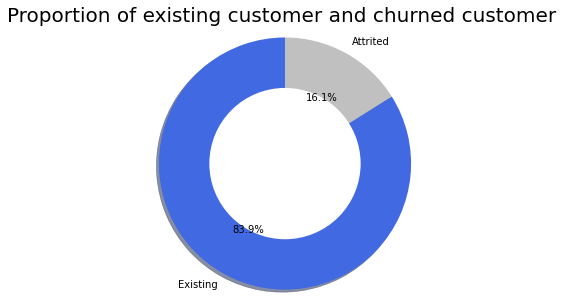

In [12]:
#Get an overview about churn rate

labels = 'Existing','Attrited'
sizes = [df.Attrition[df['Attrition']==0].count(), 
         df.Attrition[df['Attrition']==1].count()]
mycolors=['royalblue','silver']


fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', #explode=explode,
        shadow=True, startangle=90, colors=mycolors)
ax1.axis('equal')
plt.title("Proportion of existing customer and churned customer ", size = 20)

centre_circle = plt.Circle((0,0),0.6,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()



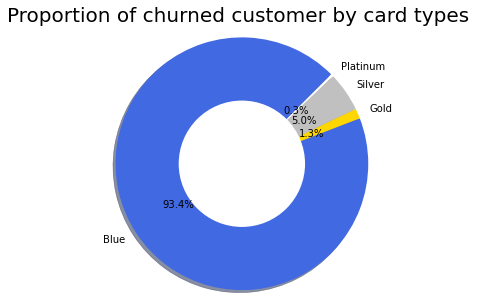

In [13]:
# Proportion of churned customer by card types 

labels = 'Blue', 'Gold' ,'Silver', 'Platinum'
mycolors=['royalblue','gold' ,'silver', 'white']
df1=df[df['Attrition']==1]
sizes = [df1.Card_Category[df1['Card_Category']=='Blue'].count(),
        df1.Card_Category[df1['Card_Category']=='Gold'].count(),
        df1.Card_Category[df1['Card_Category']=='Silver'].count(),
        df1.Card_Category[df1['Card_Category']=='Platinum'].count()]

fig1, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sizes,  labels=labels, colors=mycolors,autopct='%1.1f%%', shadow=True, startangle=45)
ax1.axis('equal')
plt.title("Proportion of churned customer by card types ", size = 20)

centre_circle = plt.Circle((0,0),0.5,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

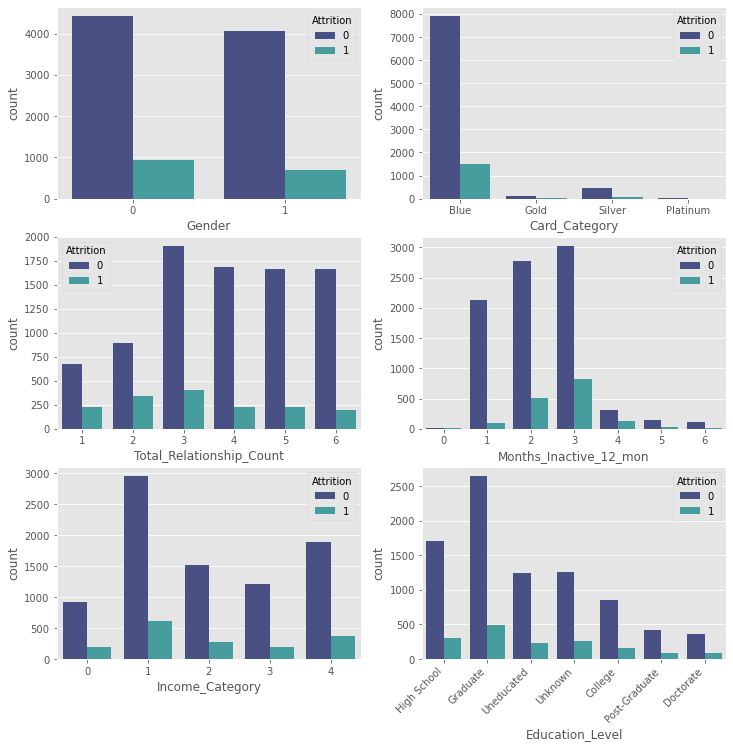

In [14]:
 # Review relation of 'Attrition' with categorical variables
fig, axarr = plt.subplots(3, 2, figsize=(12, 12))

sns.countplot(x='Gender', hue = 'Attrition',data = df, palette='mako',ax=axarr[0][0])
sns.countplot(x='Card_Category', hue = 'Attrition',data = df,palette='mako', ax=axarr[0][1])
sns.countplot(x='Total_Relationship_Count', hue = 'Attrition',data = df,palette='mako', ax=axarr[1][0])
sns.countplot(x='Months_Inactive_12_mon', hue = 'Attrition',data = df,palette='mako', ax=axarr[1][1])
sns.countplot(x='Income_Category', hue = 'Attrition',data = df, palette='mako',ax=axarr[2][0])
sns.countplot(x='Education_Level', hue = 'Attrition',data = df, palette='mako',ax=axarr[2][1])

plt.xticks( rotation=45, 
    horizontalalignment='right',
    fontweight='light' );


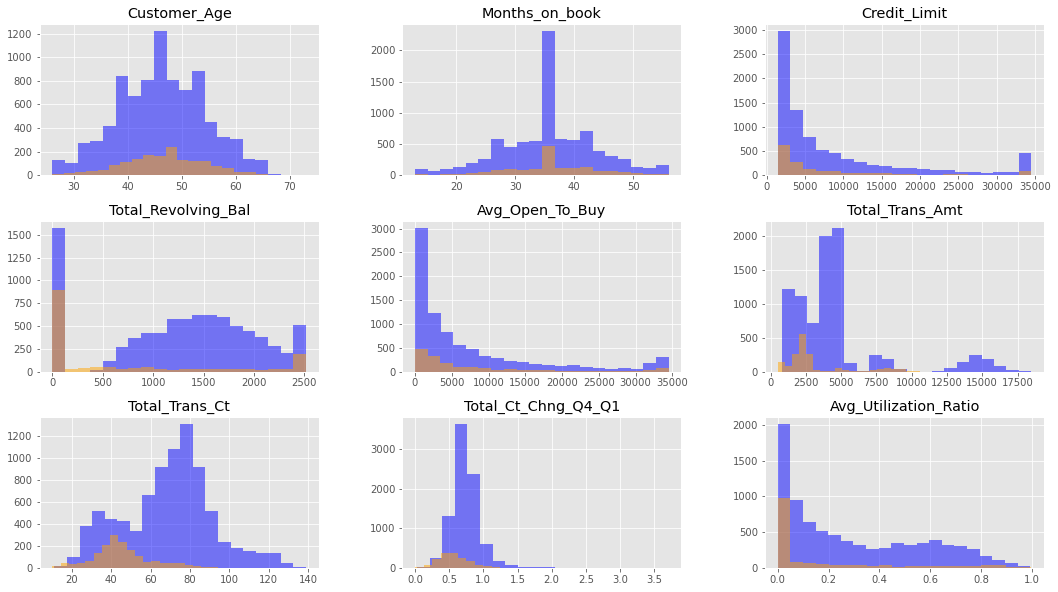

In [15]:
 # Review relation of 'Attrition' with continious variables

numerical_features=['Customer_Age','Months_on_book','Credit_Limit',
                    'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Trans_Amt',
                    'Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']
fig,ax=plt.subplots(3,3,figsize=(18,10))
df[df.Attrition==0][numerical_features].hist(bins=20, color='blue',alpha=0.5,ax=ax)
df[df.Attrition==1][numerical_features].hist(bins=20, color='orange',alpha=0.5,ax=ax);


In [16]:
#Encode all object type variables, so we can check correlation of all variables in this dataframe
for column in df.columns:
    if df[column].dtype=='object':
        df[column]=LabelEncoder().fit_transform(df[column])
dfcorr=df.drop(columns=['CLIENTNUM'], inplace=True)

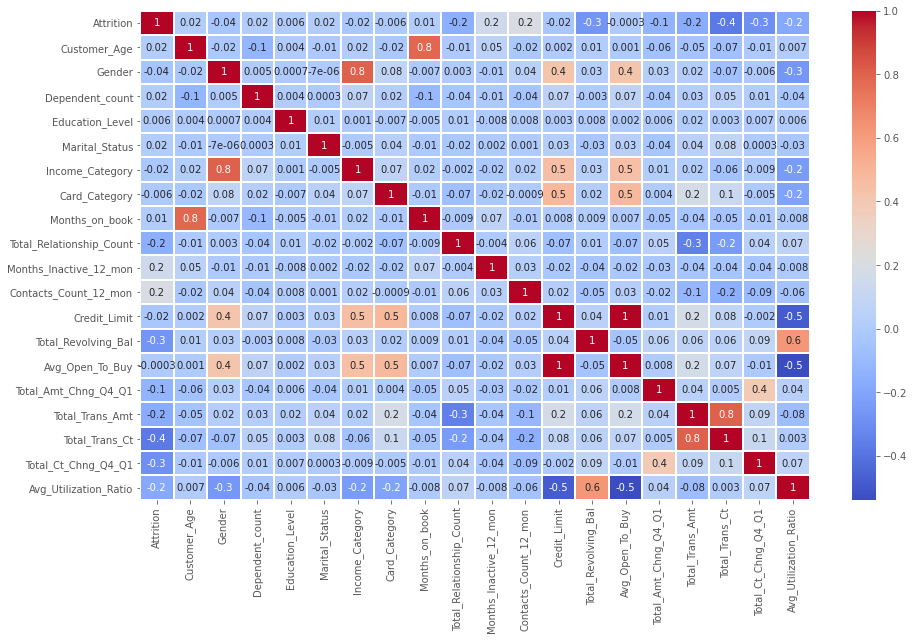

In [17]:
#Plot correlation map

plt.figure(figsize=(15,9)) 
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', linewidths = 1,fmt='.1g')
plt.show()

In [18]:
df.groupby(['Gender'])['Income_Category'].value_counts().sort_values(ascending=True)

Gender  Income_Category
1       0                    52
        1                   277
        2                   776
0       2                  1014
        0                  1060
1       3                  1402
        4                  2262
0       1                  3284
Name: Income_Category, dtype: int64

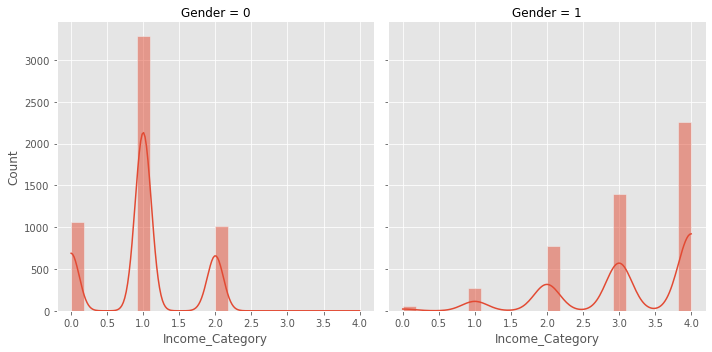

In [19]:
#Check relation between Income and Gender
sns.displot(data=df, x="Income_Category", col="Gender", kde=True);

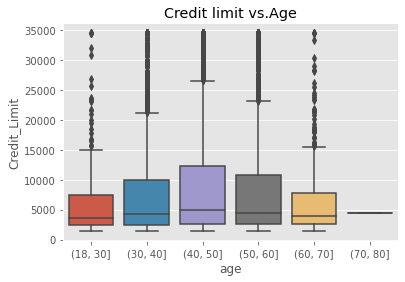

In [20]:
df1 = df.copy()
df1["age"] = pd.cut(df.Customer_Age, [18, 30, 40, 50, 60, 70, 80])
sns.boxplot( x = df1['age'], y = df1['Credit_Limit']).set_title('Credit limit vs.Age');

## 4.  Data preparation and feature selection for modelling



In [21]:
#Arrange columns by data type for easier manipulation

continuous_vars=['Customer_Age','Months_on_book','Credit_Limit','Total_Revolving_Bal','Total_Amt_Chng_Q4_Q1',
               'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1']

In [22]:
cat_vars=['Gender','Income_Category','Dependent_count','Marital_Status','Total_Relationship_Count','Contacts_Count_12_mon'] 

In [23]:
cols_to_scale=['Customer_Age','Months_on_book','Credit_Limit',
               'Total_Trans_Amt','Total_Trans_Ct']
scaler=MinMaxScaler()

df[cols_to_scale]=scaler.fit_transform(df[cols_to_scale])

In [24]:
df.dtypes

Attrition                     int64
Customer_Age                float64
Gender                        int64
Dependent_count               int64
Education_Level               int32
Marital_Status                int32
Income_Category               int64
Card_Category                 int32
Months_on_book              float64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt             float64
Total_Trans_Ct              float64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

## 5.  Model fitting

### 5.1 Model1: Logistic Regression

In [25]:
#Scale the data

X=df[continuous_vars + cat_vars]
y=df['Attrition']

X=StandardScaler().fit_transform(X)

In [26]:
#Split the data into 80% training, 20% testing

x_train,x_test, y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [27]:
#Create the model
model=LogisticRegression()

#Train the model
model.fit(x_train,y_train)

LogisticRegression()

In [28]:
predictions=model.predict(x_test)

In [29]:
print(predictions)

[0 0 0 ... 0 0 0]


In [30]:
#Check result
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1699
           1       0.75      0.52      0.62       327

    accuracy                           0.89      2026
   macro avg       0.83      0.74      0.78      2026
weighted avg       0.89      0.89      0.89      2026



In [31]:
prob=np.round(model.predict_proba(x_test)[:,1],2)

In [32]:
prob

array([0.07, 0.  , 0.04, ..., 0.07, 0.18, 0.08])

Text(51.0, 0.5, 'Actual')

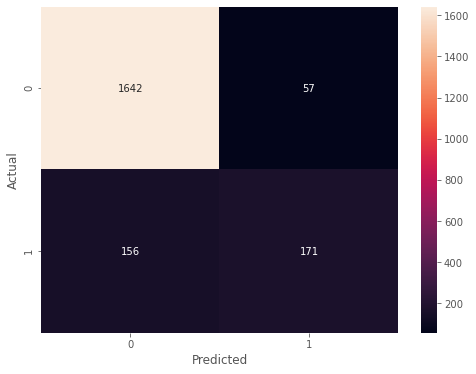

In [33]:
import tensorflow as tf
cm = tf.math.confusion_matrix(labels=y_test,predictions=predictions)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 5.2  Model 2: Artificial Neural Networks

In [34]:
import tensorflow as tf
from tensorflow import keras


model_ann = keras.Sequential([
    keras.layers.Dense(14, input_shape=(14,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')])

# opt = keras.optimizers.Adam(learning_rate=0.01)

model_ann.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_ann.fit(x_train, y_train, epochs=100)

Epoch 1/100
254/254 [==============================] - 1s 883us/step - loss: 0.5423 - accuracy: 0.7328
Epoch 2/100
254/254 [==============================] - 0s 690us/step - loss: 0.3023 - accuracy: 0.8881
Epoch 3/100
254/254 [==============================] - 0s 690us/step - loss: 0.2666 - accuracy: 0.9002
Epoch 4/100
254/254 [==============================] - 0s 674us/step - loss: 0.2624 - accuracy: 0.8993
Epoch 5/100
254/254 [==============================] - 0s 686us/step - loss: 0.2426 - accuracy: 0.9052
Epoch 6/100
254/254 [==============================] - 0s 682us/step - loss: 0.2396 - accuracy: 0.9066
Epoch 7/100
254/254 [==============================] - 0s 678us/step - loss: 0.2360 - accuracy: 0.9075
Epoch 8/100
254/254 [==============================] - 0s 674us/step - loss: 0.2151 - accuracy: 0.9152
Epoch 9/100
254/254 [==============================] - 0s 670us/step - loss: 0.2021 - accuracy: 0.9148
Epoch 10/100
254/254 [==============================] - 0s 686us/step - l

254/254 [==============================] - 0s 662us/step - loss: 0.1379 - accuracy: 0.9451
Epoch 80/100
254/254 [==============================] - 0s 658us/step - loss: 0.1380 - accuracy: 0.9460
Epoch 81/100
254/254 [==============================] - 0s 666us/step - loss: 0.1438 - accuracy: 0.9390
Epoch 82/100
254/254 [==============================] - 0s 674us/step - loss: 0.1275 - accuracy: 0.9485
Epoch 83/100
254/254 [==============================] - 0s 686us/step - loss: 0.1327 - accuracy: 0.9464
Epoch 84/100
254/254 [==============================] - 0s 765us/step - loss: 0.1326 - accuracy: 0.9454
Epoch 85/100
254/254 [==============================] - 0s 721us/step - loss: 0.1361 - accuracy: 0.9434
Epoch 86/100
254/254 [==============================] - 0s 686us/step - loss: 0.1344 - accuracy: 0.9446
Epoch 87/100
254/254 [==============================] - 0s 784us/step - loss: 0.1334 - accuracy: 0.9435
Epoch 88/100
254/254 [==============================] - 0s 769us/step - loss:

In [35]:
model_ann.evaluate(x_test, y_test)


64/64 [==============================] - 0s 649us/step - loss: 0.1520 - accuracy: 0.9378


[0.15196719765663147, 0.9378085136413574]

In [36]:
yp = model_ann.predict(x_test)
yp[:5]


array([[3.5336316e-03],
       [2.3938141e-05],
       [1.8924743e-02],
       [3.0906498e-03],
       [3.4242707e-01]], dtype=float32)

In [37]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [38]:
y_pred[:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1]

In [39]:
from sklearn.metrics import confusion_matrix 

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1699
           1       0.86      0.74      0.79       327

    accuracy                           0.94      2026
   macro avg       0.90      0.86      0.88      2026
weighted avg       0.94      0.94      0.94      2026



Text(51.0, 0.5, 'Actual')

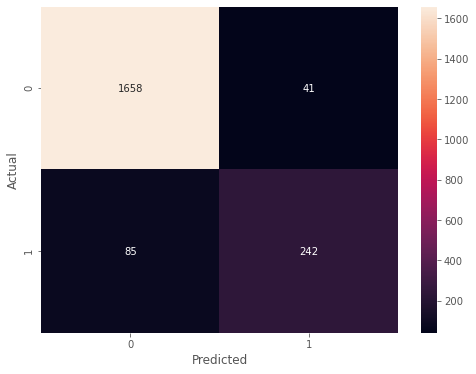

In [40]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (8,6))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')

## 6. Apply ANN prediction to the entire dataset

To predict the possibility of churn of all existing customers.

In [41]:
xp =np.round(model.predict(X),2) 

In [42]:
df2=df
df2['Prediction']=xp

In [43]:
df2.sample(5)

,Attrition,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,...,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Prediction
9836,0,0.723404,0,1,6,2,1,0,0.883721,3,...,3,0.140599,1341,4748.0,0.757,0.756760,0.875969,0.809,0.220,0
9113,0,0.404255,1,2,2,1,3,2,0.418605,2,...,1,1.000000,1308,33208.0,0.746,0.459720,0.736434,0.780,0.038,0
5640,0,0.340426,1,2,6,2,4,0,0.395349,4,...,1,0.839136,892,28303.0,0.565,0.217036,0.441860,0.763,0.031,0
625,0,0.659574,1,4,4,1,4,0,0.883721,4,...,3,0.469008,0,16952.0,0.709,0.078335,0.395349,0.649,0.000,0
9926,1,0.063830,1,1,2,1,3,0,0.093023,5,...,4,0.153025,2517,3983.0,0.915,0.497441,0.534884,0.646,0.387,0


Text(0.5, 1.0, 'Possibility to churn of current customers')

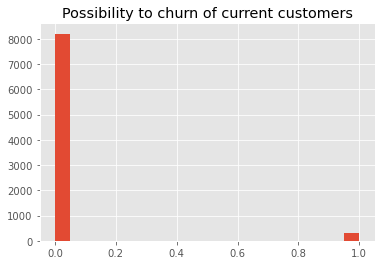

In [44]:
#Possibility to churn of current customers

df2[df2['Attrition']==0]['Prediction'].hist(bins=20).set_title('Possibility to churn of current customers')

In [45]:
df2[df2['Attrition']==0]['Prediction'].value_counts()


0    8200
1     300
Name: Prediction, dtype: int64